In [1]:
import xarray as xr
import dask
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import os
import glob as glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar

In [2]:
#open all GODAS files
GT = xr.open_dataarray('/g/data/e14/sm2435/GODAS_dtdt.nc')
GU = xr.open_dataarray('/g/data/e14/sm2435/GODAS_uadv.nc')
GV = xr.open_dataarray('/g/data/e14/sm2435/GODAS_vadv.nc')
GW = xr.open_dataarray('/g/data/e14/sm2435/GODAS_wadv.nc')
GQ = xr.open_dataarray('/g/data/e14/sm2435/GODAS_qnet.nc')
NU = xr.open_dataarray('/g/data/e14/sm2435/OBSwind_u.nc')
NV = xr.open_dataarray('/g/data/e14/sm2435/OBSwind_v.nc')

In [3]:
#open all EC-earth files
T = xr.open_dataarray('/g/data/e14/sm2435/EC_dtdt.nc')
U = xr.open_dataarray('/g/data/e14/sm2435/EC_uadv.nc')
V = xr.open_dataarray('/g/data/e14/sm2435/EC_vadv.nc')
W = xr.open_dataarray('/g/data/e14/sm2435/EC_wadv.nc')
Q = xr.open_dataarray('/g/data/e14/sm2435/EC_qnet.nc')

UA = xr.open_dataarray('/g/data/e14/sm2435/Ewind_u.nc')
VA = xr.open_dataarray('/g/data/e14/sm2435/Ewind_v.nc')

In [4]:
#now restrict domain on all
T = T.sel(lat=slice(-40,40),lon=slice(35,135))
U = U.sel(lat=slice(-40,40),lon=slice(35,135))
V = V.sel(lat=slice(-40,40),lon=slice(35,135))
W = W.sel(lat=slice(-40,40),lon=slice(35,135))
Q = Q.sel(lat=slice(-40,40),lon=slice(35,135))
UA = UA.sel(lat=slice(-40,40),lon=slice(35,135))
VA = VA.sel(lat=slice(-40,40),lon=slice(35,135))

GT = GT.sel(lat=slice(-40,40),lon=slice(35,135))
GU = GU.sel(lat=slice(-40,40),lon=slice(35,135))
GV = GV.sel(lat=slice(-40,40),lon=slice(35,135))
GW = GW.sel(lat=slice(-40,40),lon=slice(35,135))
GQ = GQ.sel(lat=slice(-40,40),lon=slice(35,135))
NU = NU.sel(lat=slice(-40,40),lon=slice(35,135))
NV = NV.sel(lat=slice(-40,40),lon=slice(35,135))

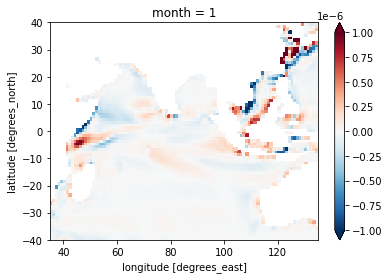

In [5]:
U[0].plot(vmin = -1E-6, vmax = 1E-6, cmap = 'RdBu_r')

In [6]:
def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 150., -40., 40.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    if i == 11:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax

def plot_(dict_name, minv, maxv):
    fig, axes = plt.subplots(nrows=12, ncols=6, figsize=(14, 30), sharey='all', sharex='all', 
                             subplot_kw={'projection':ccrs.PlateCarree()})
    #unpack dict
    for num, key in enumerate(dict_name.keys()):
        var = dict_name[key]
        lons = var.lon
        lats = var.lat
        #dTdt
        axes[0,num].set_title(key)
        axi=0
        for i in range(0,12):
            
            axes[i, num].pcolormesh(lons, lats, var.sel(month = (i+1)), 
                                #levels = 41, 
                                cmap = 'RdBu_r', 
                                #add_colorbar=True, 
                                vmin = minv, vmax = maxv, 
                                transform=ccrs.PlateCarree())
            #anchor text at side of plot for label
            if num ==0:
                axes[i, num].text(-0.1,0.5, str(calendar.month_name[var.month.values[i]]))
            plot_background(axes[i, num], i, num)
            axi=axi+1
    cbar_ax2 = fig.add_axes([1, 0.5, 0.03, 0.3])
    cmap2 = plt.cm.RdBu_r
    bounds = np.linspace(minv, maxv, 41)
    norm2 = mpl.colors.BoundaryNorm(bounds, cmap2.N)
    cb = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmap2, norm=norm2,
        spacing='proportional', ticks=bounds, boundaries=bounds)
    #fig.tight_layout()
    return fig

In [7]:
resid_g = GT - GQ + GU + GV + GW

In [8]:
resid_E = T - Q +U+V+W

In [9]:
#Pack data into dicts
EC_dict = {'dTdt':T, 'uadv':-1*U, 'vadv':-1*V, 'wadv':-1*W, 'qnet':Q, 'resid':resid_E}
G_dict = {'dTdt':GT, 'uadv':-1*GU, 'vadv':-1*GV, 'wadv':-1*W, 'qnet':GQ, 'resid':resid_g}

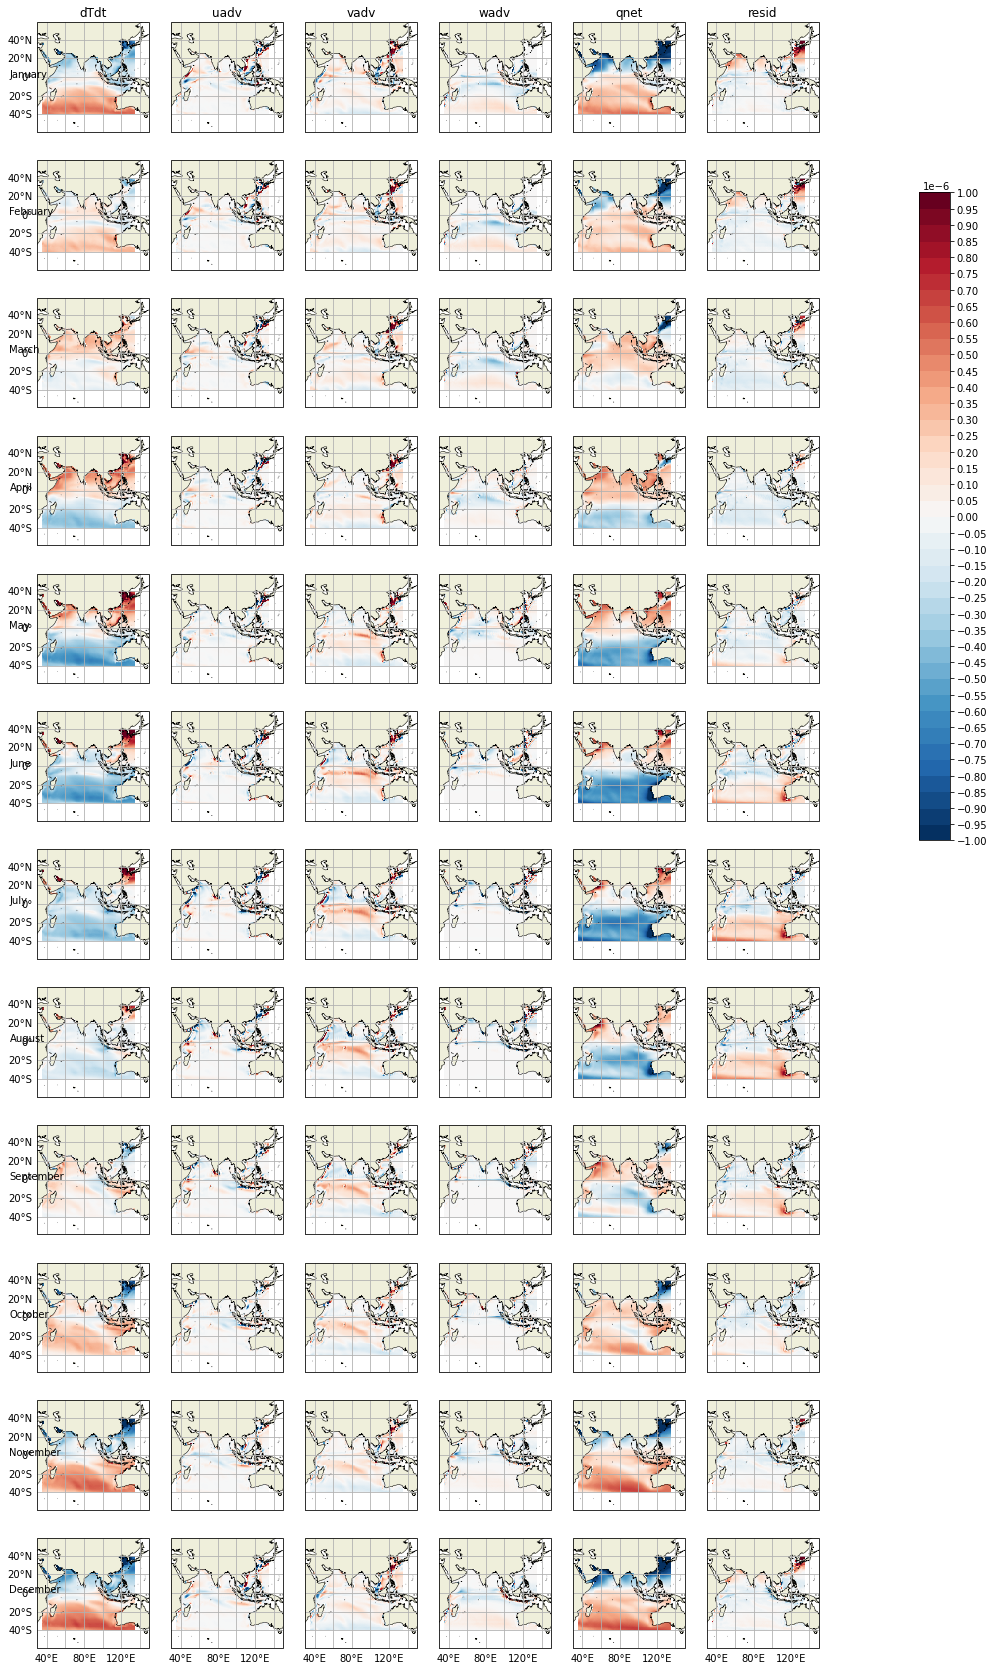

In [10]:
fig1 = plot_(EC_dict, -1e-6, 1e-6)
fig1.savefig('/home/561/sm2435/Documents/figures/ECPLOT_newjul9.png', dpi = 300, bbox_inches='tight')

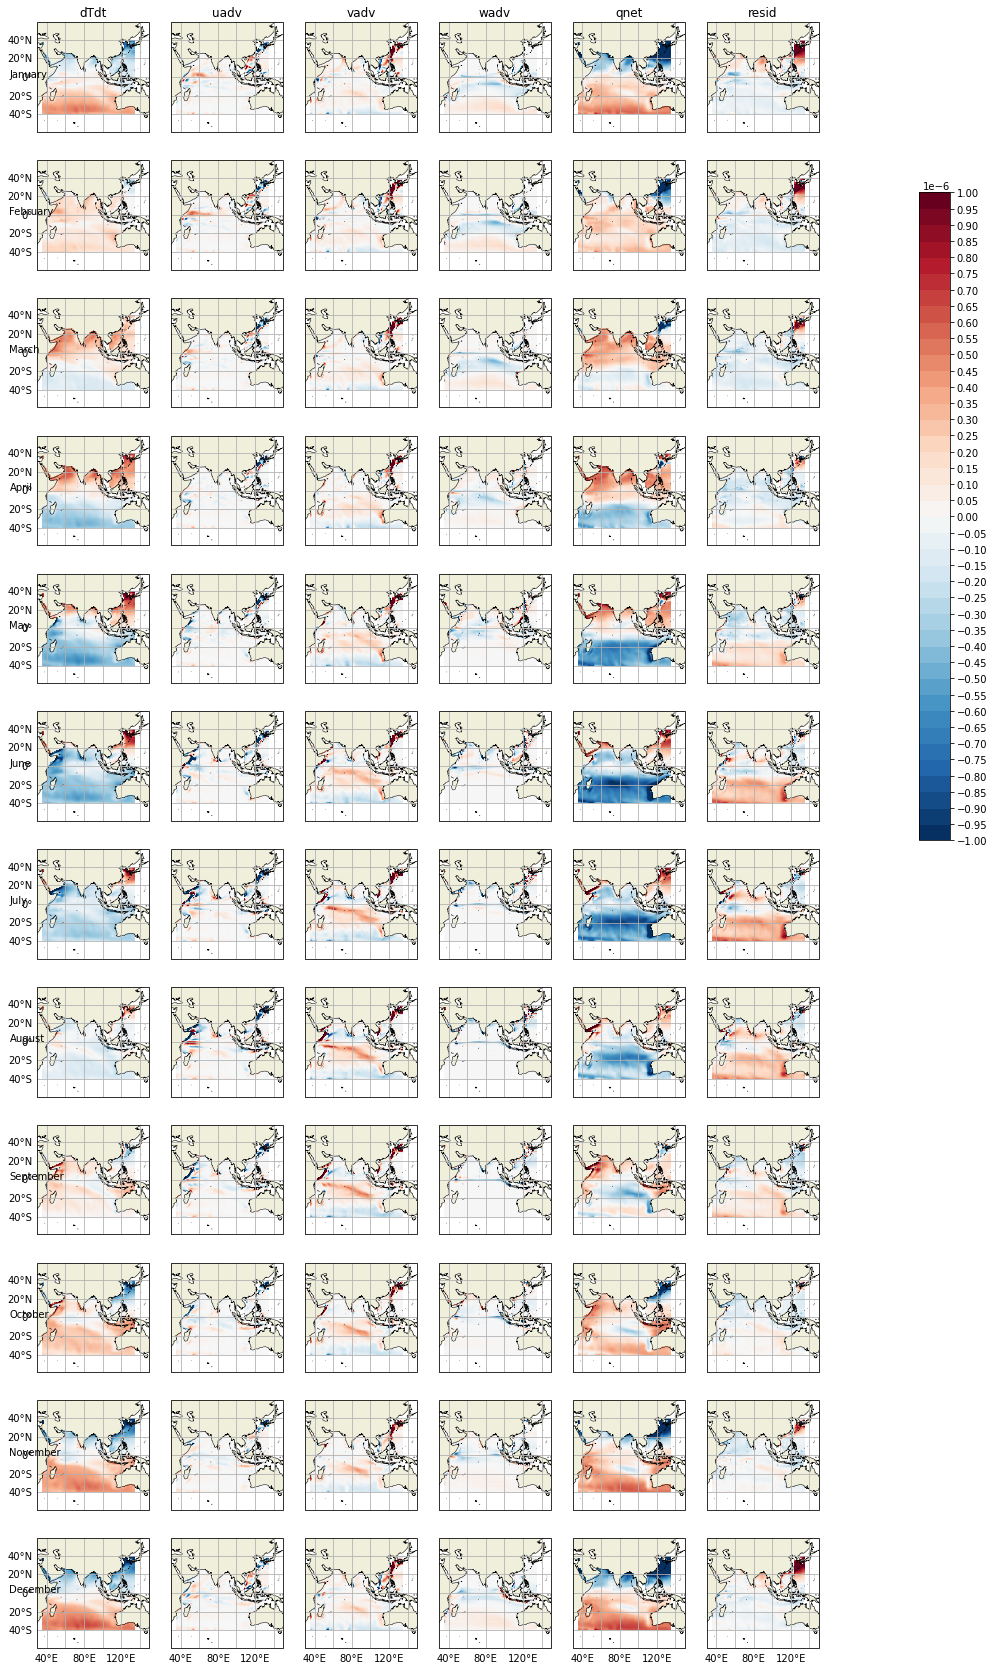

In [11]:
fig2 = plot_(G_dict, -1e-6, 1e-6)
fig2.savefig('/home/561/sm2435/Documents/figures/GPLOT_newjul9.png', dpi = 300, bbox_inches='tight')

In [12]:
diff = {'dTdt':T-GT, 'uadv':-U--GU, 'vadv':-V--GV, 'wadv':-W--GW, 'qnet':Q-GQ, 'resid':resid_E-resid_g}

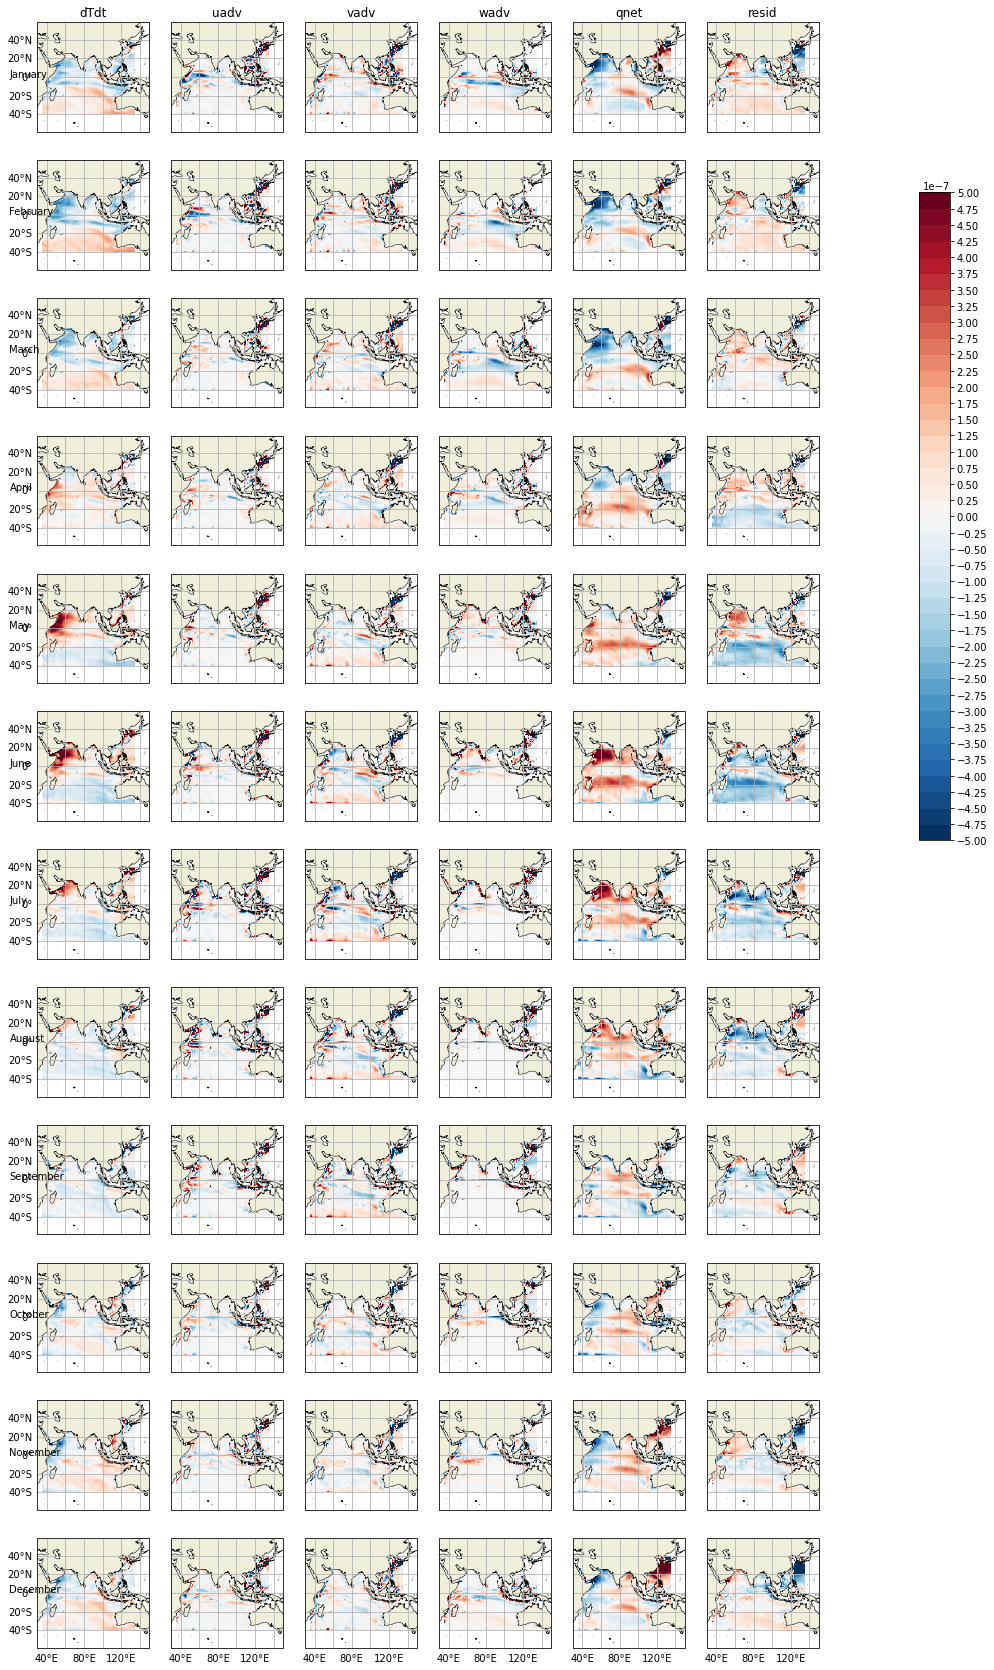

In [13]:
fig3 = plot_(diff, -5e-7, 5e-7)
fig3.savefig('/home/561/sm2435/Documents/figures/diffPLOT_newjul9.png', dpi = 300, bbox_inches='tight')

In [14]:
sys.exit()

NameError: name 'sys' is not defined

In [ ]:

#load in difference terms and plot them in plots like above
ddx = xr.open_dataarray('/g/data/e14/sm2435/ddtdx.nc')
ddy = xr.open_dataarray('/g/data/e14/sm2435/ddtdy.nc')
ddz = xr.open_dataarray('/g/data/e14/sm2435/ddtdz.nc')
du = xr.open_dataarray('/g/data/e14/sm2435/du.nc')
dv = xr.open_dataarray('/g/data/e14/sm2435/dv.nc')
dw = xr.open_dataarray('/g/data/e14/sm2435/dw.nc')

In [ ]:
#clip down to size
ddx = ddx.sel(lat=slice(-40,40),lon=slice(35,135))
ddy = ddy.sel(lat=slice(-40,40),lon=slice(35,135))
ddz = ddz.sel(lat=slice(-40,40),lon=slice(35,135))
du = du.sel(lat=slice(-40,40),lon=slice(35,135))
dv = dv.sel(lat=slice(-40,40),lon=slice(35,135))
dw = dw.sel(lat=slice(-40,40),lon=slice(35,135))


In [ ]:
#plot manually
def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 150., -25., 25.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    if i == 11:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax

fig6, axes = plt.subplots(nrows=12, ncols=6, figsize=(14, 26), sharey='all', sharex='all', 
                         subplot_kw={'projection':ccrs.PlateCarree()})
lons = ddx.lon
lats = ddx.lat
#dTdt
axes[0,0].set_title('Diff U')
for i in range(0,12):
    axes[i, 0].pcolormesh(lons, lats, du[i], 
                         cmap = 'RdBu_r', 
                        vmin = -1, vmax = 1, 
                        transform=ccrs.PlateCarree())
    #anchor text at side of plot for label
    axes[i, 0].text(-0.1,0.5, str(calendar.month_name[du.month.values[i]]))
    plot_background(axes[i, 0], i, 0)
    
#U
axes[0,1].set_title('diff dTdx')
for i in range(0,12):
    axes[i, 1].pcolormesh(lons, lats, ddx[i], 
                        cmap = 'RdBu_r', 
                         vmin = -1e-5, vmax = 1e-5, 
                        transform=ccrs.PlateCarree())
    plot_background(axes[i, 1], i, 1)
#V
axes[0,2].set_title('diff V')

for i in range(0,12):
    axes[i, 2].pcolormesh(lons, lats, dv[i], 
                        cmap = 'RdBu_r', 
                         vmin = -0.1, vmax = 0.1, 
                        transform=ccrs.PlateCarree())
    plot_background(axes[i, 2], i, 2)
#W
axes[0,3].set_title('diff dTdy')

for i in range(0,12):
    axes[i, 3].pcolormesh(lons, lats, ddy[i], 
                        cmap = 'RdBu_r', 
                         vmin = -1e-5, vmax = 1e-5, 
                        transform=ccrs.PlateCarree())
    plot_background(axes[i, 3], i, 3)
#Q
axes[0,4].set_title('diff W')

for i in range(0,12):
    axes[i, 4].pcolormesh(lons, lats, dw[i], 
                        cmap = 'RdBu_r', 
                         vmin = -1e-5, vmax = 1e-5, 
                        transform=ccrs.PlateCarree())
    plot_background(axes[i, 4], i, 4)
    
axes[0,5].set_title('diff dTdz')

for i in range(0,12):
    axes[i, 5].pcolormesh(lons, lats, ddz[i], 
                        cmap = 'RdBu_r', 
                         vmin = -0.1, vmax = 0.1, 
                        transform=ccrs.PlateCarree())
    plot_background(axes[i, 5], i, 5)
    
cbar_ax2 = fig.add_axes([1, 0.5, 0.03, 0.3])
cmap2 = plt.cm.RdBu_r
bounds = np.linspace(-1.e-6, 1.e-6, 41)
norm2 = mpl.colors.BoundaryNorm(bounds, cmap2.N)
cb = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmap2, norm=norm2,
    spacing='proportional', ticks=bounds, boundaries=bounds)
fig6.tight_layout()
fig3.savefig('/home/561/sm2435/Documents/figures/wind_diff.png', dpi = 300, bbox_inches='tight')

In [ ]:
#load into dict
adv_dict = {'diff u': du, 'diff dTdx': ddx,'diff v': dv, 'diff dTdy': ddy,'diff w': dw, 'diff dTdz': ddz,}

In [ ]:
du.max()

In [ ]:
#nowlets analyse how different winds are
wind_d = {'EC U':UA, 'GODAS U':NU[:,0], 'EC V':VA,'GODAS V':NV[:,0], 'diff U':NU[:,0]-UA, 'diff V':NV[:,0]-VA  }

In [ ]:
plot_(wind_d, -10,10)

In [ ]:
NU

In [ ]:
dw[0].plot()

In [ ]:
ddx[0].plot(cmap = 'viridis')

In [ ]:
#want to understand what imoact the difference in U wind is having. See how it correlates to difference in currents
from scipy.stats import pearsonr


In [ ]:
#correlate du dv dw with 
diff_Uw = NU[:,0]-UA
diff_Vw = NV[:,0]-VA

In [ ]:
def multi_apply_along_axis(func1d, axis, arrs, *args, **kwargs):
    """
    Given a function `func1d(A, B, C, ..., *args, **kwargs)`  that acts on 
    multiple one dimensional arrays, apply that function to the N-dimensional
    arrays listed by `arrs` along axis `axis`
    
    If `arrs` are one dimensional this is equivalent to::
    
        func1d(*arrs, *args, **kwargs)
    
    If there is only one array in `arrs` this is equivalent to::
    
        numpy.apply_along_axis(func1d, axis, arrs[0], *args, **kwargs)
        
    All arrays in `arrs` must have compatible dimensions to be able to run
    `numpy.concatenate(arrs, axis)`
    
    Arguments:
        func1d:   Function that operates on `len(arrs)` 1 dimensional arrays,
                  with signature `f(*arrs, *args, **kwargs)`
        axis:     Axis of all `arrs` to apply the function along
        arrs:     Iterable of numpy arrays
        *args:    Passed to func1d after array arguments
        **kwargs: Passed to func1d as keyword arguments
    """
    # Concatenate the input arrays along the calculation axis to make one big
    # array that can be passed in to `apply_along_axis`
    import numpy
    carrs = numpy.concatenate(arrs, axis)
    
    # We'll need to split the concatenated arrays up before we apply `func1d`,
    # here's the offsets to split them back into the originals
    offsets=[]
    start=0
    for i in range(len(arrs)-1):
        start += arrs[i].shape[axis]
        offsets.append(start)
            
    # The helper closure splits up the concatenated array back into the components of `arrs`
    # and then runs `func1d` on them
    def helperfunc(a, *args, **kwargs):
        arrs = numpy.split(a, offsets)
        return func1d(*[*arrs, *args], **kwargs)
    
    # Run `apply_along_axis` along the concatenated array
    return numpy.apply_along_axis(helperfunc, axis, carrs, *args, **kwargs)

In [ ]:
du_na = du.fillna(0)
dv_na = dv.fillna(0)
dw_na = dw.fillna(0)


In [ ]:
from scipy.stats.stats import pearsonr

r,p = multi_apply_along_axis(pearsonr,0 ,[diff_Uw, du_na])

In [ ]:
plt.pcolormesh(r)
plt.colorbar()

In [ ]:
plt.pcolormesh(np.where(p>0.3, p, 0))
plt.colorbar()

In [ ]:
r,p = multi_apply_along_axis(pearsonr,0 ,[diff_Vw, dv_na])

In [ ]:
plt.pcolormesh(np.where(p>0.9, p, 0))
plt.colorbar()

In [ ]:
plt.pcolormesh(r)

In [ ]:
#plot fucntion. 1 variable, defined color range
def plot_background_sml(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 120., -25., 15.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    if i == 5:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax

def plot_sml(dict_name, maxv, minv, varname):
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 12), sharey='all', sharex='all', 
                             subplot_kw={'projection':ccrs.PlateCarree()})
    var = dict_name
    lons = var.sel(lat=slice(-55,40),lon=slice(30,150)).lon
    lats = var.sel(lat=slice(-55,40),lon=slice(30,150)).lat
    #dTdt
    #axes[0,num].set_title(key)
    axi=1
    for col in range(0,2):
        for row in range(0,6):

            axes[row, col].pcolormesh(lons, lats, var.sel(lat=slice(-55,40),lon=slice(30,150)).sel(month = (axi)), 
                                #levels = 41, 
                                cmap = 'RdBu_r', 
                                #add_colorbar=True, 
                                vmin = minv, vmax = maxv, 
                                transform=ccrs.PlateCarree())
            #title is month
            axes[row, col].set_title(var.sel(month = (axi)).month.values)
            plot_background_sml(axes[row, col], row, col)
            axi=axi+1

            
    cbar_ax2 = fig.add_axes([1, 0.5, 0.03, 0.3])
    cmap2 = plt.cm.RdBu_r
    bounds = np.linspace(minv, maxv, 21)
    norm2 = mpl.colors.BoundaryNorm(bounds, cmap2.N)
    cb = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmap2, norm=norm2,
        spacing='proportional', ticks=bounds, boundaries=bounds)
    fig.suptitle(varname)
    #fig.tight_layout()
    return fig

In [ ]:
#Now plot varailes we want to plot
#first the difference in different variables
X = plot_sml(du, 1, -1, 'Difference in u current climatology')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/ucurdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(dv, 0.1, -0.1, 'Difference in v current climatology')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/vcurdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(dw, 1e-5, -1e-5, 'Difference in w current climatology')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/wcurdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(ddx, 5e-6, -5e-6, 'Difference in dTdx climatology')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/dTdxdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(ddy, 5e-6, -5e-6, 'Difference in dTdy climatology')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/dTdydiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(ddz, 0.1, -0.1, 'Difference in dTdz climatology')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/dTdzdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
#plot differences in each term of heat budget
diff.keys()

In [ ]:
#Plot the difference terms

In [ ]:
X = plot_sml(diff['dTdt'], 5e-7, -5e-7, 'Difference in dTdt (GODAS-model)')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/dTdtdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(diff['uadv'], 5e-7, -5e-7, 'Difference in U advection (GODAS-model)')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/uadvdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(diff['vadv'], 5e-7, -5e-7, 'Difference in V advection (GODAS-model)')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/vadvdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(diff['wadv'], 5e-7, -5e-7, 'Difference in W advection (GODAS-model)')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/wadvdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(diff['qnet'], 5e-7, -5e-7, 'Difference in Qnet (GODAS-model)')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/qnetdiff.png', dpi = 300, bbox_inches='tight')

In [ ]:
#Now plot differences in wind
wind_d.keys()

In [ ]:
X = plot_sml(wind_d['diff U'], 5, -5, 'Difference in U wind (NCEP-model)')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/uwind_diff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(wind_d['diff V'], 5, -5, 'Difference in V wind (NCEP-model)')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/vwind_diff.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(wind_d['EC U'], 10, -10, 'EC Earth3 U wind')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/ece_uwind.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(wind_d['EC V'], 10, -10, 'EC Earth3 V wind')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/ece_vwind.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(wind_d['GODAS U'], 10, -10, 'NCEP U wind')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/ncep_uwind.png', dpi = 300, bbox_inches='tight')

In [ ]:
X = plot_sml(wind_d['GODAS V'], 10, -10, 'NCEP V wind')
X.savefig('/home/561/sm2435/Documents/figures/differnce_terms/ncep_vwind.png', dpi = 300, bbox_inches='tight')

In [ ]:
GU

In [ ]:
GU